Now we want to solve the following LP from Assignment 3 and plot the feasible region:
\begin{equation}
\begin{aligned}
\max_{} \quad & z=2x_1+3x_2     \\
\textrm{   s.t.} \quad & x_1+2x_2\leq 6,\\
  &2x_1+x_2\leq 8 ,   \\
   &x_1,x_2\geq 0.    \\
\end{aligned}
\end{equation}

First we import the necessary packages:

In [72]:
# import PuLP for solving the LP
import pulp
import numpy as np
import matplotlib.pyplot as plt
 # import all functions from matplotlib library 
from matplotlib.pyplot import *
 # import arange function from numpy library, which helps us to set the graph
from numpy import arange 


Then instantiate a problem class, we’ll name it “problem1” and we’re looking for an optimal maximum so we use LpMaximize

In [73]:
# First define the figure to save the graph on
figure()
# define a domain for x1, x2 and the increment. For instance, we assume that x1 and x2 are between 0 and 10 with increment 1.
x=arange(0,10,1)
y=arange(0,10,1)

<Figure size 432x288 with 0 Axes>

Then we define the constraints lines as follow:
    

In [74]:
y1=3-0.5*x
y2=8-2*x


Now we define the grid as follows:


Text(0, 0.5, 'x2')

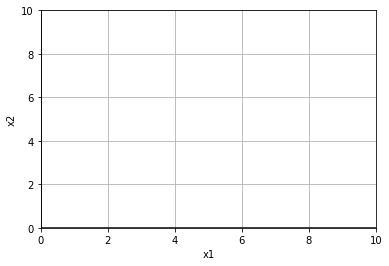

In [75]:
xlim(0,10)
ylim(0,10)
hlines(0,0,10,color='k')
vlines(0,0,10,color='k')
grid(True)
xlabel('x1')
ylabel('x2')

Now we plot the constraints lines as follow:
    

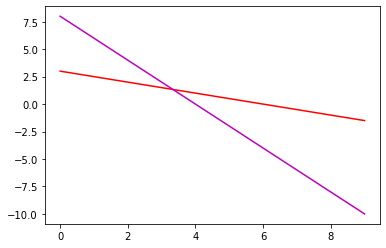

In [76]:
plot(x,y1,color='r')
plot(x,y2,color='m')


So all together:

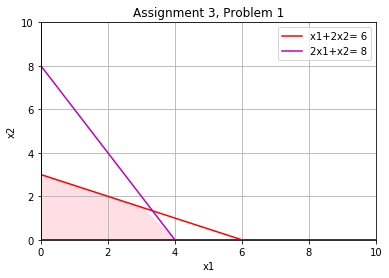

In [77]:
xlim(0,10)
ylim(0,10)
hlines(0,0,20,color='k')
vlines(0,0,20,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
title ('Assignment 3, Problem 1')
legend(['x1+2x2= 6', '2x1+x2= 8'] )
# Now we fill up the feasible region.  
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, color='pink',alpha=0.5)

In [78]:
z = pulp.LpProblem('problem1', pulp.LpMaximize)



We then model our decision variables using the LpVariable class. In our example, x_1 and x_2 are greater than or equal to 0.

In [79]:
x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)

The objective function and constraints are added using the += operator to our model.
Note that the objective function is added first and the following will be the contsraints. 

In [80]:
# Objective function
z += 2*x1 + 3*x2

In [81]:
# constraints 
z += 1*x1 + 2*x2 <= 6
z += 2*x1 + 1*x2 <= 8

We have now constructed our problem and can have a look at it.



In [82]:
z

problem1:
MAXIMIZE
2*x1 + 3*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 6

_C2: 2 x1 + x2 <= 8

VARIABLES
x1 Continuous
x2 Continuous

Now we want to check to find out which case occurs:

1. Optimal: An optimal solution has been found.

2. Infeasible: There are no feasible solutions .

3. Unbounded: The constraints are not bounded, maximising the solution will tend towards infinity 

In [83]:
pulp.LpStatus[z.solve()]


'Optimal'

We can now view our maximal variable values and the maximum value of $Z$.

In [84]:
for variable in z.variables():
    print ("{} = {}".format(variable.name, variable.varValue))

x1 = 3.3333333
x2 = 1.3333333


In [85]:
print ("z=", pulp.value(z.objective))


z= 10.6666665


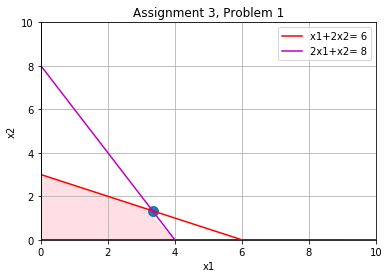

In [86]:
xlim(0,10)
ylim(0,10)
hlines(0,0,20,color='k')
vlines(0,0,20,color='k')
grid(True)
xlabel('x1')
ylabel('x2')
plot(x,y1,color='r')
plot(x,y2,color='m')
title ('Assignment 3, Problem 1')
legend(['x1+2x2= 6', '2x1+x2= 8'] )
# Now we fill up the feasible region.  
y3=np.minimum(y1,y2)
plt.fill_between(x, y3, color='pink',alpha=0.5)
plt.scatter(10/3, 4/3, s=100)
